In [2]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib inline


movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [3]:
genres_list = []
seen_genres = set()
num = 0
for index, row in read_data.iterrows():
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1               
print(f"Number of movies without a genre {num}")

Number of movies without a genre 28


In [4]:
x_axis = np.arange(len(genres_list))
tick_locations = [value+0.4 for value in x_axis]
count_dict = {}
def count(gen, cnt):
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1        
        except:
        
            pass
    
    return cnt

for genre in genres_list:
    count_dict[genre]=count(genre, 0)
count_dict


{'Action': 1029,
 'Adventure': 714,
 'Fantasy': 356,
 'Science-Fiction': 476,
 'Crime': 593,
 'Drama': 1875,
 'Thriller': 1073,
 'Animation': 207,
 'Family': 426,
 'Western': 66,
 'Comedy': 1386,
 'Romance': 731,
 'Horror': 418,
 'Mystery': 295,
 'History': 166,
 'War': 132,
 'Music': 143,
 'Documentary': 96,
 'Foreign': 34,
 'TV-Movie': 5}

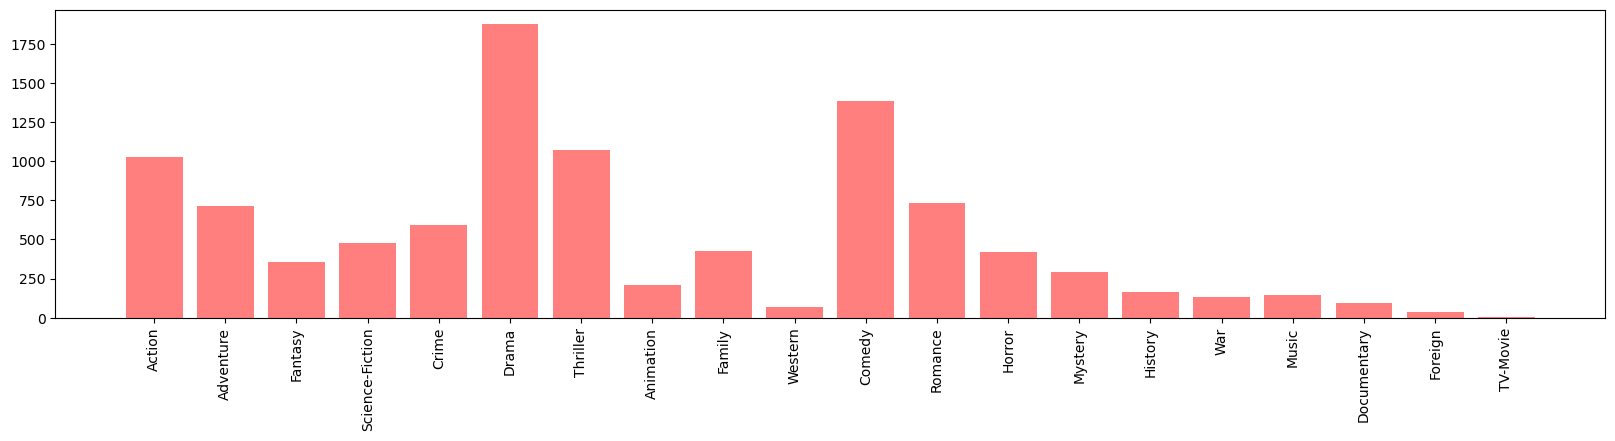

In [5]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dict.values(), color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, count_dict.keys(), rotation="vertical")
plt.show()

In [6]:
#Find top langauges 
top_languages = read_data['original_language'].value_counts().head(5)

# Display the result
print(top_languages)

original_language
en    3821
fr      45
es      27
zh      20
de      20
Name: count, dtype: int64


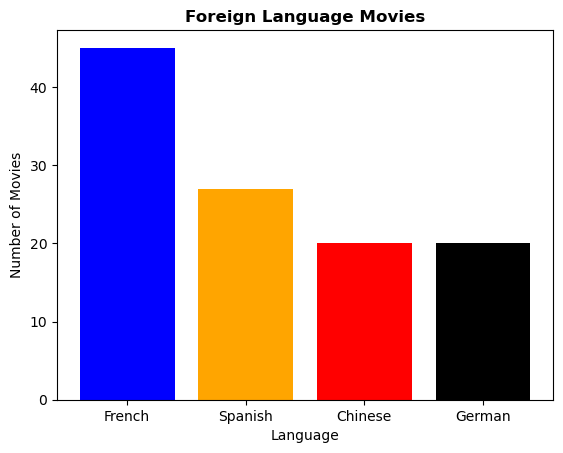

In [7]:

# Top 4 languages
top_languages = read_data['original_language'].value_counts().head(4)

# Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [45, 27, 20, 20]

# The colors of each bar
colors = ["blue", "orange", "red", "black"]

# Create the bar chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Foreign Language Movies', fontweight='bold')
plt.ylabel('Number of Movies')
plt.xlabel('Language')
# Display the bar chart
plt.show()



In [8]:
plt.savefig('movie_languages_chart.jpg')

In [9]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]  #French, Spanish, Chinese, German
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]

print(average_ratings_for_top_languages)

original_language
fr    6.324444
es    6.622222
zh    6.150000
de    6.390000
Name: vote_average, dtype: float64


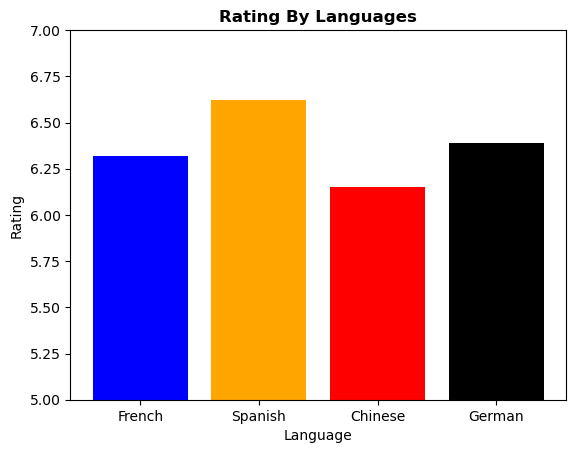

In [10]:
#Find Average rating by language 
average_ratings_by_language = read_data.groupby('original_language')['vote_average'].mean()

# Print the average ratings for the top languages
top_languages_list = ["fr", "es", "zh", "de"]
average_ratings_for_top_languages = average_ratings_by_language[top_languages_list]
#Labels for the sections of our bar chart
labels = ["French", "Spanish", "Chinese", "German"]

# The values of each section (based on the value_counts)
sizes = [6.32,6.62,6.15,6.39]

# Create the pie chart
plt.bar(labels, sizes, color=colors)


# Add title and labels
plt.title('Rating By Languages', fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Rating')
plt.ylim(5,7)
# Display the pie chart
plt.show()

In [11]:
plt.savefig('average_ratings_by_language.jpg')

In [12]:
top_languages_list = ["en", "fr", "es", "zh", "de"]

#Find top rated movies (min 1,000 vote count)
filtered_data = read_data[
    (read_data['original_language'].isin(top_languages_list)) & 
    (read_data['vote_count'] >= 1000)]

# Top-rated movie for each language based on vote_average
top_rated_movies = filtered_data.loc[filtered_data.groupby('original_language')['vote_average'].idxmax()]

#Only first genre 
top_rated_movies['genres'] = top_rated_movies['genres'].str.split().str[0]

# Print the title, director, and vote_average columns
print(top_rated_movies[['title', 'director', 'vote_average','genres']])



                         title             director  vote_average   genres
2375                  Downfall  Oliver Hirschbiegel           7.7    Drama
1706  The Shawshank Redemption       Frank Darabont           8.5    Drama
2176           Pan's Labyrinth   Guillermo del Toro           7.6  Fantasy
1178                    Amélie   Jean-Pierre Jeunet           7.8   Comedy


In [13]:
#Full Language Names
language_names = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'zh': 'Chinese',
    'de': 'German'
}

top_rated_movies['original_language'] = top_rated_movies['original_language'].replace(language_names)

<Figure size 640x480 with 0 Axes>

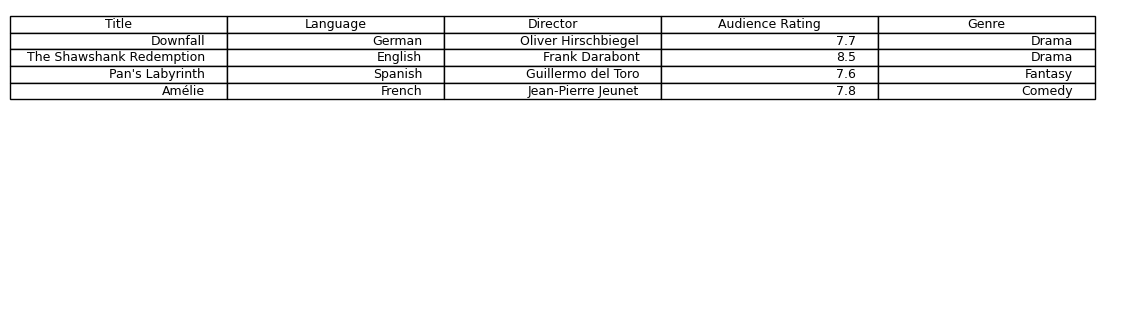

In [14]:
#Data Extraction
data = top_rated_movies[['title','original_language','director', 'vote_average','genres']]

# Create a figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')  # Turn off axis
#Table
table = plt.table(cellText=data.values, 
                  colLabels=['Title', 'Language', 'Director', 'Audience Rating','Genre'],
                  loc='best')  
table.set_fontsize(10)
plt.show()
